# Семинар 3. Визуализация. Новые признаки

Анализируем датасет с информацией об атлетах участвовавших в Олимпийских играх (**olymp.csv**)

Данные содержат следующие признаки:
- **`ID`** - уникальный номер спортсмена
- **`Name`** - имя атлета
- **`Sex`** - пол (мужской - M,  женский - F)
- **`Age`** - возраст атлета
- **`Height`** - рост (в см)
- **`Weight`** - вес (в кг)
- **`Team`** - cтрана
- **`NOC`** - код страны от Олимпийского комитета (3 буквы)
- **`Games`** - год и сезон Олимпийских игр
- **`Year`** - год Олимпийских игр
- **`Season`** - сезон (Зимние - Winter,  Лето - Summer)
- **`City`** - город проведения Олимпийских игр
- **`Sport`** - спортивная дисциплина
- **`Event`** - категория спортивной дисциплины
- **`Medal`** - достоинство медали (Золото - Gold, Серебро - Silver, Бронза - Bronze, Без медали - NaN)


In [1]:
import pandas as pd

# Читаем таблицу olymp.csv и сохраняем в переменной olmp
olmp = pd.read_csv("olymp.csv")
olmp.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [2]:
# Таблица могла подгрузиться не полностью. Если это так - выскочит ошибка
# Если с датасетом все окей - ячейка запустится без ошибок
assert olmp.shape[0] == 271116, "Ваш датасет имеет неверное число строк. Скачайте его заново"

## Новые признаки

### Задание 1
Создайте функцию **age_cat**, которая по столбцу с возрастом определяет атлета в одну из четырех групп:
- "меньше 18" (0 - 17)
- "от 18 до 30" (18 - 29)
- "30 и больше" (от 30)
- если информации о возрасте нет (**NaN**), то вернуть само значение из столбца c возрастом

In [3]:
def age_cat(x):
    if x < 18:
        return "меньше 18"
    elif x >= 18 and x < 30:
        return "от 18 до 30"
    elif x >=30:
        return "30 и больше"
    else:
        return x

### Задание 2

Датафрейм лежит в переменной `olmp`. Примените функцию созданную в прошлом задании к столбцу `Age` и создайте новый признак `Age_category` в датафрейме `olmp`.

In [4]:
olmp['Age_category'] = olmp['Age'].apply(age_cat)

### Задание 3

Определите тип данных получившегося столбца **`Age_category`**
- Категориальный порядковый (ранговый) - так как содержит категории (меньше 18, от 18 до 30 и т.д.), которые можно однозначно упорядочить 

### Задание 4

Определите процент атлетов в возрастной категории **30 и больше**, которые получили золотые медали (**Medal: Gold**). Ответ округлите до двух знаков после запятой. Целая от вещественной части отделена точкой.

**АЛГОРИТМ РЕШЕНИЯ**:

1. Найдите количество уникальных атлетов возрастной категории **30 лет и старше**:
    - *Отфильтруйте* данные, оставив только тех, кому **30 лет и старше**.
    - *Удалите дубликаты* по признаку **`ID`**, чтобы учесть только уникальных атлетов. Для этого примените метод `.drop_duplicates('признак')`.
    - Определите *количество строк* в получившемся датафрейме с помощью свойства `.shape`. Это и будет количество атлетов, которым **30 лет и старше**.
   
2. Найдите количество уникальных атлетов возрастной категории **30 лет и старше**, которые получили **золотые медали**:
    - *Отфильтруйте* данные, оставив только атлетов **30 лет и старше**, которые получили золотые медали (**Medal: Gold**).
    - *Удалите дубликаты* по признаку **`ID`**, чтобы учесть только уникальных атлетов. Для этого примените метод `.drop_duplicates('признак')`.
    - Определите *количество строк* в получившемся датафрейме с помощью свойства `.shape`. Это и будет число атлетов, которым **30 лет и старше** и которые имеют хотя бы одну золотую медаль.
   
3. Рассчитайте процент атлетов в возрастной категории **30 лет и старше**, имеющих **золотые медали**, по отношению к общему числу атлетов этой возрастной категории. 

*Примечание*: Возрастная категория — это признак `Age_category`.

In [9]:
##########  1. Фильтрация ##########
# 1.1 Количество уникальных атлетов категории 30 лет и старше
olmp_filtrated = olmp[olmp['Age_category'] == '30 и больше']

# 1.2 Количество уникальных атлетов категории 30 лет и старше, имеющих золотые медали
olmp_filtrated2 = olmp[(olmp['Age_category'] == '30 и больше') & (olmp['Medal'] == 'Gold')]

########## 2. Удаление дубликатов по атлетам ##########
# 2.1 В датафрейме с атлетами категории 30 лет и старше
olmp_filtrated = olmp_filtrated.drop_duplicates('ID')

# 2.2 В датафрейме с атлетами категории 30 лет и старше, имеющих золотые медали
olmp_filtrated2 = olmp_filtrated2.drop_duplicates('ID')

########### 3. Определяем количество атлетов ##########
# 3.1 Которым более 30 лет
num_over_30 = olmp_filtrated.shape[0]

# 3.2 Которым более 30 лет и которые имеют золотые медали
num_over_30_with_gold = olmp_filtrated2.shape[0]

########### 4. Находим процентное соотношение  ##########
num_over_30_with_gold / num_over_30 * 100

7.749364944961896

### Задание 5

Датафрейм лежит в переменной **olmp**. Cоздайте новый признак **BMI** в датафрейме **olmp**, который содержит информацию об индексе массы тела для каждого спортсмена на основе столбца с массой (**Weight**) и ростом (**Height**):
$$\text{BMI} = \frac{\text{Масса (кг.)}}{\text{Рост (м}^2\text{)}}$$

*HINT*: Обратите внимание, что рост (**Height**) в таблице дан в сантиметрах, а по формуле рост нужен в метрах

In [10]:
olmp['BMI'] = olmp['Weight'] / (olmp['Height'] / 100)**2

### Задание 6
Определите тип данных получившегося столбца **BMI**
- **Числовой непрерывный** - поскольку BMI также рассчитывается с помощью арифметических операций над непрерывными признаками (рост=Height, и вес=Weight). Непрерывные числовые признаки можно складывать, вычитать, умножать и делить, при этом результат остается в той же категории — непрерывных числовых данных.

### Задание 7
Найдите модуль разности между максимальным и минимальным значением индекса массы тела атлетов (**BMI**). Ответ округлите до двух знаков. Целая от вещественной части отделена точкой. 

**АЛГОРИТМ РЕШЕНИЯ**
1. Отсортируйте датафрейм по возрастанию по столбцу **BMI** и найдите минимальный индекс массы тела
2. Отсортируйте датафрейм по убыванию по столбцу **BMI** и найдите максимальный индекс массы тела
3. Найдите разницу между максимумом и минимумом  по модулю* (функция `abs()`)

*Модуль числа — это его абсолютное значение, которое всегда положительно, даже если число отрицательно. 
- модуль числа $-1$: $\text{abs} (-1) = 1$,
- модуль числа $1$ : $\text{abs}(1) = 1$

In [13]:
# 1. Сортируем датафрейм по возрастанию и находим минимальный индекс массы тела
BMI_min = olmp.sort_values('BMI').iloc[0]['BMI']

# 2. Сортируем датафрейм по убыванию и находим максимальный индекс массы тела
BMI_max = olmp.sort_values('BMI', ascending=False).iloc[0]['BMI']

# 3. Вычисляем модуль разности между максимумом и минимумом
abs(BMI_max - BMI_min)

np.float64(55.54062527994266)

### Задание 8

Датафрейм лежит в переменной **olmp**. Вам дан список **NA_cities**, который содержит информацию о городах Северной Америки, в которых проводилась Олимпиада 

С помощью анонимной функции создайте новый признак **`NA_olymp`**, который бы возвращал **True**, если Олимпиада проводилась в Северной Америке, а иначе **False**. Определите это на основании признака **`City`**.

In [14]:
NA_cities = ['St. Louis', 'Los Angeles', 'Lake Placid', 'Squaw Valley', 'Mexico City', 
             'Montreal', 'Calgary', 'Atlanta', 'Salt Lake City', 'Vancouver']

# x in NA_cities: возвращает True, если значение x (какое-то значение столбца) лежит в списке NA_cities. И False иначе
olmp['NA_olymp'] = olmp['City'].apply(lambda x: x in NA_cities)

### Задание 9

Определите тип данных получившегося столбца **`NA_olymp`**
- **Бинарный** - есть только два значения, **True** (=да, олимпиада проводилась в Северной Америке) и **False** (=нет, олимпиада проводилась не в  Северной Америке)

### Задание 10

Определите в каком году (**Year**) были последние зимние (**Winter**) Олимпийские игры (по признаку **Season**) в Северной Америке (по признаку **NA_olymp**)

**АЛГОРИТМ РЕШЕНИЯ**
1. *Фильтруем* датасет по двум признакам - оставляем только зимние олимпийские игры (**Season**), которые проходили в Северной Америке (**NA_olymp**)
2. *Сортируем* датасет по признаку **Year** - делаем это по убыванию, так как нас интересует последние Олимпийские игры (с наибольшим годом)
3. Извлекаем значение **Year** из первой строчки

In [17]:
# 1. Фильтрация датасета по сезону и месту проведения игры
olmp_filtrated = olmp[(olmp['Season']=='Winter') & (olmp['NA_olymp']==True)]

# 2. Сортировка датасета по убыванию Year - от новейших игр к более поздним
olmp_filtrated = olmp_filtrated.sort_values('Year', ascending=False)

# 3. Излекаем значение Year из первой строчки
olmp_filtrated.iloc[0]['Year']

np.int64(2010)

## Визуализация

### Задание 11

Какие типы визуализации подходят для представленных признаков? Поставьте + там, где график подходит, а там где нет -


| Признак  | Линейный график | Круговая диаграмма | Столбчатая диаграмма | Гистограмма |
|----------|-----------------|--------------------|----------------------|-------------|
| Sex      | -               | +                  | +                    | -           |
| Age      | -               | -                  | -                    | +           |
| Year     | +               | -                  | -                    | -           |
| Medal    | -               | +                  | +                    | -           |
| Weight   | -               | -                  | -                    | +           |

**Пояснения**
- Для категориальных данных (**Sex**, **Medal**), а также числовых дискретных (их здесь нет), подходящие визуализации - круговая и столбчатая диаграммы
- Для непрерывных числовых признаков (**Age**, **Weight**) подходящие визуализации - гистограмма
- Для признаков, связанных с временными промежутками (**Year**) можно строить линейные графики

### Задание 12

Выберите какой график визуализирует количество уникальных атлетов на каждой летней олимпиаде (по порядку) с 1980 года

**АЛГОРИТМ РЕШЕНИЯ**

1. Сделайте фильтрацию по заданным условиям (летние олимпиады с 1980 года)
2. Удалите повторяющихся атлетов с помощью `.drop_duplicates()` (по признаку **ID**)
3. Постройте частотную таблицу по отфильтрованным данным без дубликатов по столбцу **Year** с помощью `.value_counts()`
4. Отсортируйте частотную таблицу по индексам с помощью `.sort_index()`

In [18]:
olmp_filt = olmp[(olmp['Season'] == 'Summer') & (olmp['Year'] >= 1980)]
data_filt = olmp_filt.drop_duplicates('ID')

plot_data = olmp_filt['Year'].value_counts().sort_index()

<Axes: xlabel='Year'>

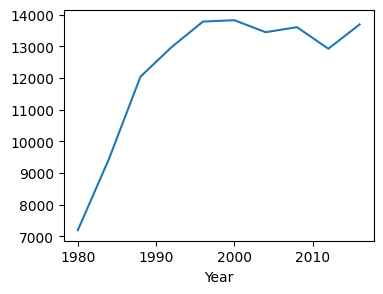

In [25]:
# линейный график
plot_data.plot(figsize=(4, 3))

<Axes: xlabel='Year'>

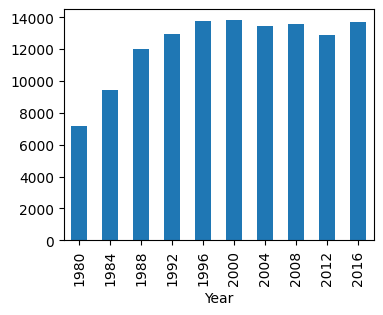

In [26]:
# столбчатая диаграмма
plot_data.plot(kind='bar', figsize=(4, 3))

<Axes: ylabel='count'>

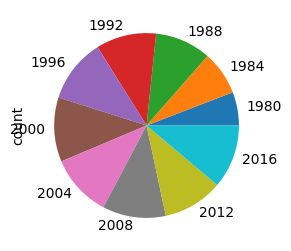

In [27]:
# круговая диаграмма
plot_data.plot(kind='pie', figsize=(4, 3))

<Axes: ylabel='Frequency'>

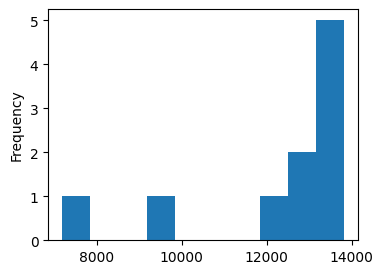

In [28]:
# гистограмма
plot_data.plot(kind='hist', figsize=(4, 3))

### Задание 13

Вам дан график динамики процентов атлетов, завоевавших золотые медали, к общему количеству участников от страны на зимних Олимпиадах с 2002 по 2014 год. Отметьте все верные утверждения:

In [38]:
# Код ниже предназначен лишь для отрисовки графика. Но для интереса можете посмотреть

def get_gold_percent_data(data_filt, noc):
    data_filt_noc = data_filt[data_filt['NOC'] == noc]
    data_filt_noc_gold = data_filt_noc[data_filt_noc['Medal']=='Gold']

    # группируем по году и считаем число уникальных атлетов
    unique_athletes_by_year = data_filt_noc.groupby('Year')['ID'].nunique()
    unique_athletes_gold_by_year = data_filt_noc_gold.groupby('Year')['ID'].nunique()

    # находим процент атлетов, завоевавших золотые медали, к общему количеству участников от страны
    athletes_percent = 100 * unique_athletes_gold_by_year / unique_athletes_by_year

    return athletes_percent

In [39]:
olmp_filt = olmp[(olmp['Season']=='Winter') & (olmp['Year'] >= 2002) & (olmp['Year'] <= 2014)]

olmp_filt_usa = get_gold_percent_data(olmp_filt, 'USA')
olmp_filt_rus = get_gold_percent_data(olmp_filt, 'RUS')
olmp_filt_chn = get_gold_percent_data(olmp_filt, 'CHN')

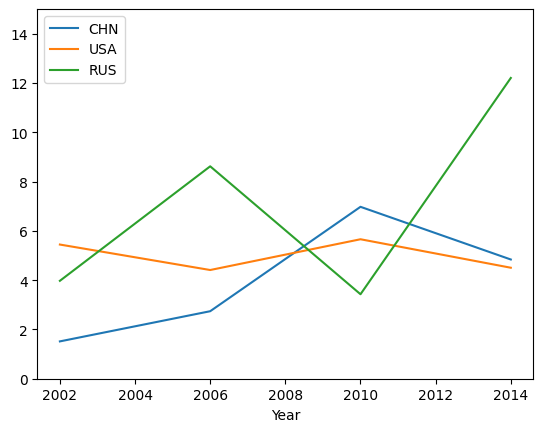

In [47]:
import matplotlib.pyplot as plt

olmp_filt_chn.plot(label='CHN')
olmp_filt_usa.plot(label='USA')
olmp_filt_rus.plot(label='RUS')

plt.ylim(0, 15)
plt.legend();

- *В 2006 году Россия (RUS) завоевала 9 золотых медалей* 
    - **Нет**. На графике мы видим лишь процентное соотношение тех, кто получил золотые медали к тем, кто их не получил. Более того, на графике отображена только зимняя олимпиада
- *Не было такой Олимпиады, на которой все представленные страны завоевали равные доли золотых медалей*
    - **Да**. Мы не видим года, когда все три графика пересекались бы по оси OY. Стоит помнить, что это пересечение должно быть строго над годом проведения олимпиады, т.к. год здесь - категориальный признак.
- *В 2010 году процент атлетов из Китая (CHN) завоевавших золотые был наибольший, по сравнению с остальными странами*
    - **Да**. У Китая он составлял ~7%, а у друних стран - ~5% и ~3% 
- *Динамика процента золотых медалей у атлетов из США (USA) менялась меньше по сравнению с другими странами*
    - **Да**, этот график менее всего "колеблется"